In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Implementing a binary problem using the Cross Library

### We use IMDB datasets to implement this type of issue 
The IMDB dataset is a collection of **50,000** movie reviews, divided into **25,000** for training and **25,000** for testing. Each set contains 50% positive reviews and 50% negative reviews.

In [2]:
from keras.datasets import imdb

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words=10000)


The meaning of num_words=10000 is to retain only the 10,000 most frequent words in the training data, and discard less frequent words.



The variables train_data and test_data are lists of reviews. Each review is itself a list of word indices. 

By "word indices," we mean integer values that represent the positions of words

In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print(train_label[0])

1


### Extracting text reviews

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

The dictionary "**word_index**" is obtained from the IMDB dataset.

This dictionary is a mapping that assigns a unique identifier to each word. Using "**reverse_word_index**," the dictionary is reversed so that the identifiers are mapped back to words.

## Data Preparation 
To insert integer lists into the neural network they must be converted into tensors

### Vectorizing train data

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    # Sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

### Vectorizing labels data

In [8]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

# Network structure
![](https://i.imgur.com/x6A5Ok7.png)

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

# Model compilation


We configure the model with the **rmsprop** optimizer and the cost function **binary_crossentropy**

In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

## Setting aside a validation set
![](https://i.imgur.com/1KSxgtZ.png)

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

The model is train for 20 epoch with batch size 512

In [12]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 66ms/step - loss: 0.5378 - accuracy: 0.7835 - val_loss: 0.4141 - val_accuracy: 0.8572
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3398 - accuracy: 0.8902 - val_loss: 0.3222 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2514 - accuracy: 0.9165 - val_loss: 0.2865 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2031 - accuracy: 0.9293 - val_loss: 0.2900 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1703 - accuracy: 0.9435 - val_loss: 0.3024 - val_accuracy: 0.8768
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1482 - accuracy: 0.9518 - val_loss: 0.2873 - val_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1257 - accuracy: 0.9621 - val_loss: 0.3151 - val_accuracy: 0.8786
Epoch 8/20
30

## Model History

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

The dictionary contains four entries:
one per metric that was being monitored during training and during validation.

### Plotting the training and validation loss

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

We extract the error values for training and evaluation from the history and we store them in loss_values and val_loss_values

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

The number of periods (epochs) is determined for the X-axis and the graph is drawn

In [17]:
epochs = range(1, len(loss_values) + 1)

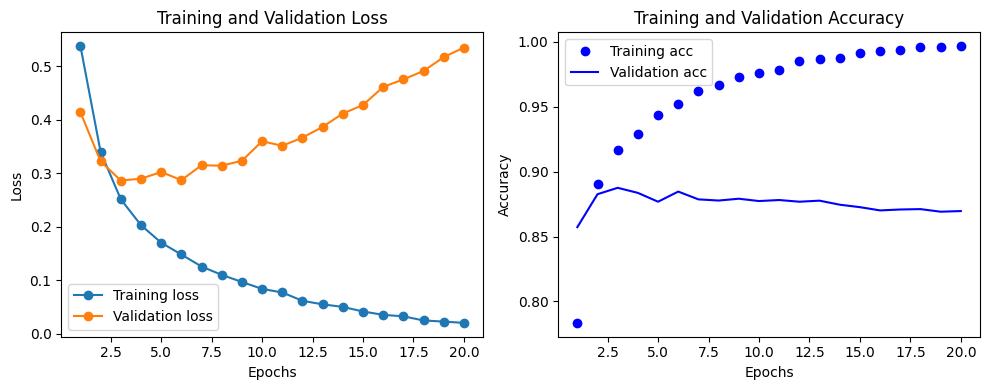

In [22]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, label='Training loss', marker='o')
plt.plot(epochs, val_loss_values, label='Validation loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.tight_layout()
plt.show()

**loss** on educational data decreases with each Epock

**accuracy** on educational data decreases with each Epock

The accuracy of the model on the training data is greater than the validation data, so the model is **overfit**.

In epoch 4, the model is overfit, so to prevent overfit, we're going to train the model to **epoch 3**.

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4505 - accuracy: 0.8247
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2726 - accuracy: 0.9036
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2158 - accuracy: 0.9232
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2866 - accuracy: 0.8861
[0.28657540678977966, 0.8861200213432312]


This fairly naive approach achieves an accuracy of 88%.

With state-of-the-art approaches, you should be able to get close to 95%.

### Good luck.